<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Variables" data-toc-modified-id="Project-Variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Variables</a></span></li><li><span><a href="#Loading-&amp;-JSON-flattening" data-toc-modified-id="Loading-&amp;-JSON-flattening-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading &amp; JSON flattening</a></span></li><li><span><a href="#Hashtag-Counting" data-toc-modified-id="Hashtag-Counting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hashtag Counting</a></span></li><li><span><a href="#Tweets-DataFrame-Overview" data-toc-modified-id="Tweets-DataFrame-Overview-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tweets DataFrame Overview</a></span></li><li><span><a href="#Top-Likes-and-Retweets" data-toc-modified-id="Top-Likes-and-Retweets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Top Likes and Retweets</a></span></li><li><span><a href="#Tag-Histogram,-Retweets-&amp;-Likes" data-toc-modified-id="Tag-Histogram,-Retweets-&amp;-Likes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tag-Histogram, Retweets &amp; Likes</a></span></li><li><span><a href="#Heatmaps" data-toc-modified-id="Heatmaps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Heatmaps</a></span><ul class="toc-item"><li><span><a href="#Retweeting" data-toc-modified-id="Retweeting-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Retweeting</a></span></li><li><span><a href="#Tweet-Liking" data-toc-modified-id="Tweet-Liking-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Tweet Liking</a></span></li></ul></li><li><span><a href="#Wordcloud" data-toc-modified-id="Wordcloud-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Wordcloud</a></span></li><li><span><a href="#Sentiments" data-toc-modified-id="Sentiments-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sentiments</a></span></li><li><span><a href="#Possible-Additions-/-Ideas--..." data-toc-modified-id="Possible-Additions-/-Ideas--...-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Possible Additions / Ideas  ...</a></span></li></ul></div>

# Project Variables

In [60]:
import os
import sys

data_folder = 'chrvoigt'
twitter_handle= 'chrvoigt'

print (f"The following data will be required, to analyze the account \n\
    - Data Folder: {data_folder}\n\
    - Twitter Handle: {twitter_handle}\n\
    - Password: ***")

# Formating Constants via Ansi 
# 
BOLD = '\033[1m'
END = '\033[0m'
HEADER = '\033[1m'+'\033[94m'+ '\033[4m'

BLUE = '\033[94m'
GREEN = '\033[92m'
Yellow = '\033[93m'
RED = '\033[91m'
 
UNDERLINE = '\033[4m'

The following data will be required, to analyze the account 
    - Data Folder: chrvoigt
    - Twitter Handle: chrvoigt
    - Password: ***


In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
#print ('last file should be "'"tweet.js"'"')
#os.listdir(data_folder)[0:11]

# Loading & JSON flattening 

In [8]:
# load account tweets from 'tweet.js'
# cutting json relevant part from file 

import pprint as pp
import json 
import pandas as pd 
import pathlib
# from pandas.io.json import json_normalize #package for flattening json in pandas df

path = pathlib.Path.cwd() / data_folder / 'tweet.js'

with open(path) as dataFile:
    data = dataFile.read()
    obj = data[data.find('[') : data.rfind(']')+1]
    jsonObj = json.loads(obj)

print (BOLD + 'Number of tweets found in this account: ' + END, len(jsonObj))
#pp.pprint(jsonObj[2]) 

Number of tweets found in this account:  2878


In [9]:
# https://github.com/amirziai/flatten

from flatten_json import flatten
tweets_flattened = (flatten(e) for e in jsonObj)
tweets_df = pd.DataFrame (tweets_flattened)
#tweets_df.head(2)

In [10]:
# exploring columns 
print()
print(HEADER + 'The dataset includes ', len( tweets_df.columns),' columns:' + END)
print('These are some of the column names: \n', sorted(tweets_df.columns[0:50]))


The dataset includes  269  columns:
These are some of the column names: 
 ['created_at', 'display_text_range_0', 'display_text_range_1', 'entities_hashtags_0_indices_0', 'entities_hashtags_0_indices_1', 'entities_hashtags_0_text', 'entities_hashtags_1_indices_0', 'entities_hashtags_1_indices_1', 'entities_hashtags_1_text', 'entities_hashtags_2_indices_0', 'entities_hashtags_2_indices_1', 'entities_hashtags_2_text', 'entities_hashtags_3_indices_0', 'entities_hashtags_3_indices_1', 'entities_hashtags_3_text', 'entities_symbols', 'entities_urls_0_display_url', 'entities_urls_0_expanded_url', 'entities_urls_0_indices_0', 'entities_urls_0_indices_1', 'entities_urls_0_url', 'entities_user_mentions', 'entities_user_mentions_0_id', 'entities_user_mentions_0_id_str', 'entities_user_mentions_0_indices_0', 'entities_user_mentions_0_indices_1', 'entities_user_mentions_0_name', 'entities_user_mentions_0_screen_name', 'entities_user_mentions_1_id', 'entities_user_mentions_1_id_str', 'entities_user_

# Hashtag Counting

In [11]:
# counting number of hashtags and adding column 'num_of_tags' to *tweets_df*   

print ('The following describes the occurence of hashtags, as they are considered an important element to link and structure tweets') 

i=0
tagCols = ['entities_hashtags_0_text','entities_hashtags_1_text',
   'entities_hashtags_2_text','entities_hashtags_3_text','entities_hashtags_4_text',
   'entities_hashtags_5_text','entities_hashtags_6_text']

for i in range (len(tweets_df)):
    num_of_tags = 0
    for tag_column in tagCols:
        if tweets_df.loc[[i],[tag_column]].notnull().bool():
            num_of_tags +=1
        else:
            break
    #print (i,"  ",num_of_tags)
    tweets_df.loc[i,'num_of_tags']=num_of_tags
 

The following describes the occurence of hashtags, as they are considered an important element to link and structure tweets


In [12]:
# ... ['favorite_count','retweet_count','num_of_tags']  formated without decimals 
tweets_df[['favorite_count','retweet_count','num_of_tags']] = \
            tweets_df[['favorite_count','retweet_count','num_of_tags']].astype(int)

In [13]:
#import numpy as np
tweets_df_tagged = tweets_df [tweets_df['entities_hashtags_0_text'].isnull() == False]
print ('Tweets with hashtags: ', len (tweets_df_tagged))
print ('Tweets w/o hashtags: ', len(tweets_df) - len (tweets_df_tagged))


Tweets with hashtags:  1622
Tweets w/o hashtags:  1256


In [14]:
tag_count = tweets_df[['num_of_tags','retweet_count']].\
            groupby(['num_of_tags']).count().reset_index(drop=False)
tag_count.columns = ['num_of_tags','num_of_tweets']
tag_count = tag_count.reset_index(drop=True)

#tag_count

In [15]:
react_count = tweets_df.groupby (['num_of_tags'])['favorite_count','retweet_count'].mean().reset_index()
#react_count

In [16]:
std_dev = tweets_df.groupby (['num_of_tags'])['favorite_count','retweet_count'].std().reset_index()
#std_dev

In [17]:
tw_max = tweets_df.groupby (['num_of_tags'])['favorite_count','retweet_count'].max().reset_index()
#tw_max

# Tweets DataFrame Overview 

In [18]:
tag_overview =pd.DataFrame()
tag_overview = tag_count [['num_of_tweets']]
tag_overview [['num_of_tags','averg_favs','averg_retw']] = react_count [['num_of_tags','favorite_count','retweet_count']] 
tag_overview [['fav_std','ret_std']] = std_dev [['favorite_count','retweet_count']] 
tag_overview = tag_overview [['num_of_tags','num_of_tweets','averg_favs','fav_std','averg_retw','ret_std']]
tag_overview [['max_retweet','max_likes']] = tw_max [['retweet_count','favorite_count']] 
tag_overview.reset_index(drop=True)

,num_of_tags,num_of_tweets,averg_favs,fav_std,averg_retw,ret_std,max_retweet,max_likes
0,0,1256,0.077229,0.390636,0.061306,0.336705,6,7
1,1,840,0.176190,0.819840,0.172619,0.617552,7,13
2,2,511,0.348337,0.903149,0.260274,0.762328,6,8
3,3,176,0.522727,1.084723,0.454545,0.996096,5,6
4,4,63,0.952381,2.853569,0.555556,1.445547,9,21
5,5,27,0.703704,1.409168,0.444444,0.847319,3,6
6,6,2,0.000000,0.000000,0.000000,0.000000,0,0
7,7,3,0.666667,1.154701,1.000000,1.732051,3,2


# Top Likes and Retweets 

In [19]:
tweets_df [['favorite_count','full_text']].sort_values(by='favorite_count', ascending=False).head(6).style.hide_index()


favorite_count,full_text
21,"Very Valid Point by @BPrainsack: If #facebook is interested in good research on #AI #Ethics they should pay taxes which finance research through the proper channels, rather than financing specific ethics programs #apascienceevent"
13,"if the Four Horsemen of the Apocalypse were to appear, then we would be in deep trouble, piece by @Floridi https://t.co/wNi4noLuQ6 #AIfears"
8,fantastic input from @expecteverythin @hypatiaprojects project! on #21centturyskills@katalabVIE @b_streicher @DOIT_Europe_Net @ZSInnovation https://t.co/0ZdV9p1p9U
8,FINALLY I understand #unicode it's all about 🍺 - https://t.co/OBfb3mZGzJ #python3 by @realpython thx :-)
7,"Might be of help in @DOIT_Europe_Net or @eCraft2Learn or .. 🤔.. klein, mobil & handlich #makered by @adafruit with multiple programming options and built-in sensors https://t.co/IWvePWg7iq https://t.co/npo5mpQ2wu"
7,Last preparations for maker fair #vienna Saturday: Stand E13👍@doit_europe_net @ZSInnovation @bkieslinger https://t.co/GhM1FN1xeY https://t.co/rswjbXo8iD


In [20]:
tweets_df [['retweet_count','full_text']].sort_values(by='retweet_count', ascending=False).head(6).style.hide_index()

retweet_count,full_text
9,"Very Valid Point by @BPrainsack: If #facebook is interested in good research on #AI #Ethics they should pay taxes which finance research through the proper channels, rather than financing specific ethics programs #apascienceevent"
7,"if the Four Horsemen of the Apocalypse were to appear, then we would be in deep trouble, piece by @Floridi https://t.co/wNi4noLuQ6 #AIfears"
6,“Massive Change — 10 Provocations for the Next 10 years of Social Innovation.” by @indy_johar https://t.co/IImYxVWMvh
6,#openData needs open services along the researcher's journey to foster uptake (via @OpenAIRE_eu) #ICT2015 https://t.co/8v7S5bH8b9
5,uBiome clinical lab microbiome-based personalized medicine #citizenscience #socinn http://t.co/Rv3teMeTss congratulations to @jessicarichman
5,Fab labs can become the new libraries see http://t.co/yr7Nh4t2kR by @tomasdiez & fab lab conference https://t.co/yqUelMjCmX #DSIPolicy


# Tag-Histogram, Retweets & Likes

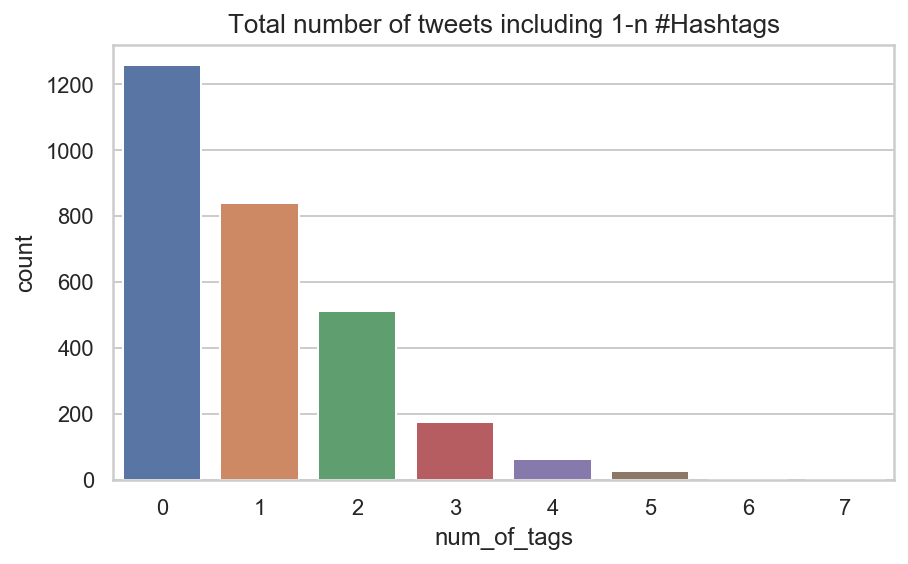

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
# or use sns.set_style("ticks")
sns.set(style="whitegrid", context='notebook')
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title ('Total number of tweets including 1-n #Hashtags', size = 13)
ax = sns.countplot(x="num_of_tags", data=tweets_df)

In [22]:
#sns.pairplot(tweets_df[['favorite_count','retweet_count','num_of_tags']])

In [23]:
#compact = df[(df["retweet_count"]<4)&(df["favorite_count"]<4)&(df["num_of_tags"]<=4)]
compact = tweets_df[(tweets_df["num_of_tags"]<=4)]
len(compact)

2846

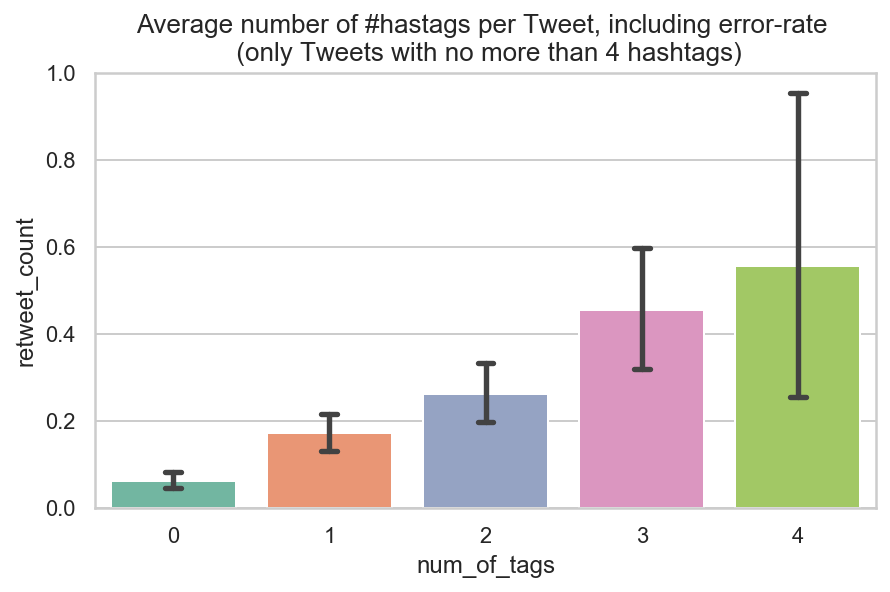

In [24]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title ('Average number of #hastags per Tweet, including error-rate \n (only Tweets with no more than 4 hashtags)', size = 13)
ax = sns.barplot(x="num_of_tags", y="retweet_count",data=compact, palette="Set2", capsize=0.1)

In [25]:
# ylim requires some logic 
tag_overview_comp = tag_overview[tag_overview['num_of_tags']<=4]

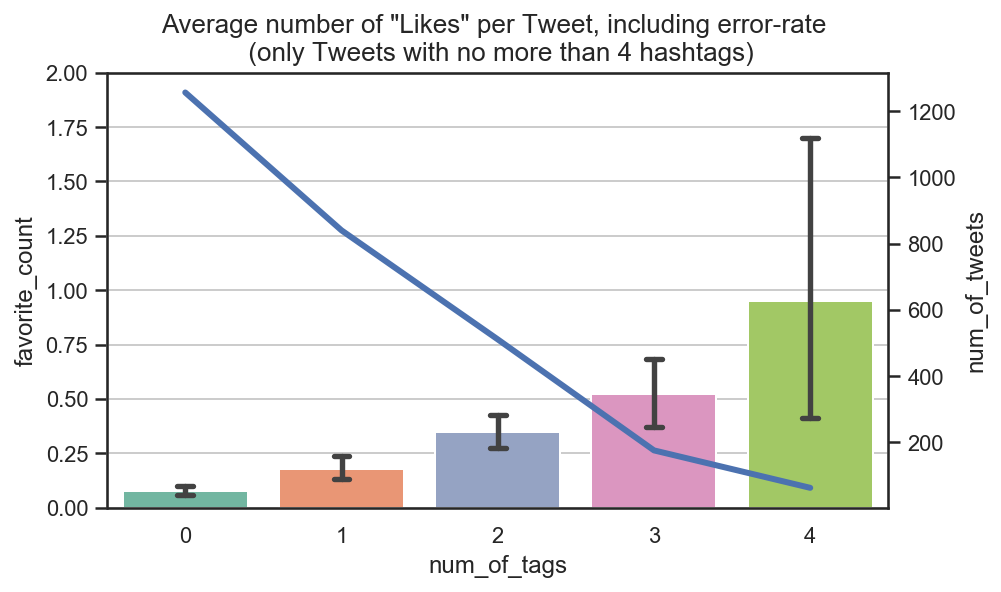

There is a second y-axis to indicate the number of actual tweets behind the average. This line should be omitted if published.


In [27]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 4))

# control x and y limits
plt.ylim(0, 2, 1)
plt.xlim(0, None)

sns.set_style("ticks")
ax.set_title ('Average number of "'"Likes"'" per Tweet, including error-rate \n (only Tweets with no more than 4 hashtags)', size = 13)

ax = sns.barplot(x="num_of_tags", y="favorite_count",data=compact, palette="Set2", capsize=0.1)
ax2 = ax.twinx()
sns.lineplot(x="num_of_tags", y='num_of_tweets',ax=ax2, data=tag_overview_comp, linewidth=3)

sns.set(style="whitegrid")
plt.show()

print ('There is a second y-axis to indicate the number of actual tweets behind the average. This line should be omitted if published.')

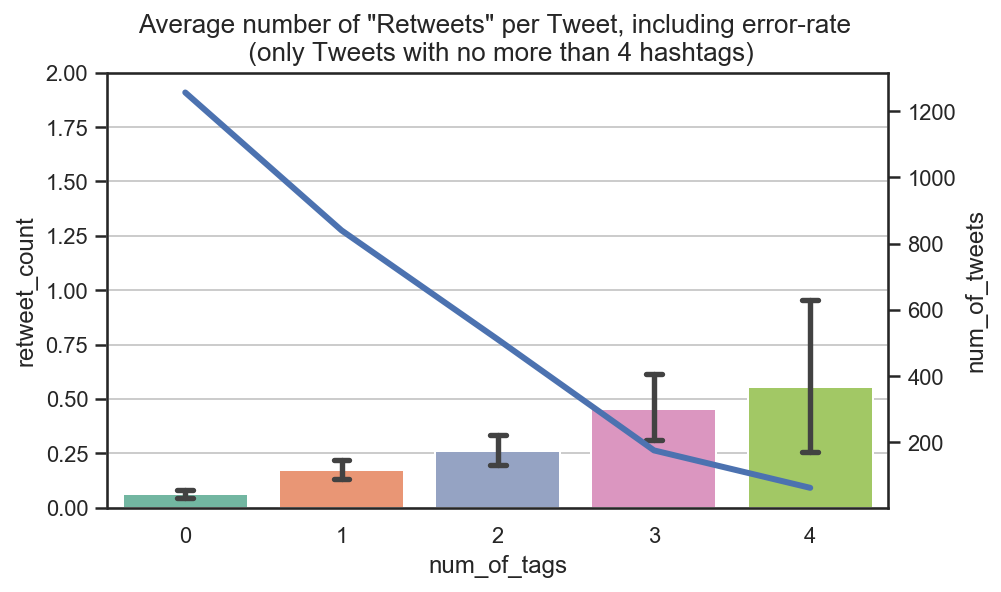

In [29]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 4))

# control x and y limits
plt.ylim(0, 2, 1)
plt.xlim(0, None)

sns.set_style("ticks")
ax = sns.barplot(x="num_of_tags", y="retweet_count",data=compact, palette="Set2", capsize=0.1)
ax.set_title ('Average number of "'"Retweets"'" per Tweet, including error-rate \n (only Tweets with no more than 4 hashtags)', size = 13)
ax2 = ax.twinx()
sns.lineplot(x="num_of_tags", y='num_of_tweets',ax=ax2, data=tag_overview_comp, linewidth=3)

sns.set(style="whitegrid")

# Heatmaps 

## Retweeting

The Heatmap for 'retweets' visualizes the frequency of a given **'number of tags'** x **'number of retweets'**.  

In [30]:
heat_retweet = tweets_df[['retweet_count','num_of_tags','favorite_count']].groupby(['num_of_tags','retweet_count']).count().reset_index()
#heat_retweet.head(15)

In [38]:
pivot_heat_retweet = heat_retweet.pivot('retweet_count','num_of_tags','favorite_count')
#pivot_heat_retweet
pivot_heat_retweet_1 = pivot_heat_retweet.iloc [1:]
pivot_heat_retweet_1

num_of_tags,0,1,2,3,4,5,6,7
retweet_count,,,,,,,,
1,42.0,63.0,43.0,23.0,5.0,6.0,NaN,NaN
2,11.0,13.0,16.0,6.0,5.0,NaN,NaN,NaN
3,1.0,10.0,10.0,9.0,2.0,2.0,NaN,1.0
4,1.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN
5,NaN,3.0,2.0,2.0,1.0,NaN,NaN,NaN
6,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [39]:
import numpy as np
# only about 9.9% are retweeted (chrvoigt) 
print('tweets total:',len(tweets_df))
print('tweets with tags:',len(tweets_df_tagged))
print('tagged tweets as percent: {00:.00%}'.format(len(tweets_df_tagged)/len(tweets_df)))
#print('tweets with zero retweets:',pivot_heat_retweet.iloc[0,:].sum())
print('tweets with one or more retweets:',np.sum(pivot_heat_retweet_1).sum())
print('retweets as percent: {00:.00%}'.format(np.sum(pivot_heat_retweet_1).sum()/len(tweets_df)))


tweets total: 2878
tweets with tags: 1622
tagged tweets as percent: 56%
tweets with one or more retweets: 287.0
retweets as percent: 10%


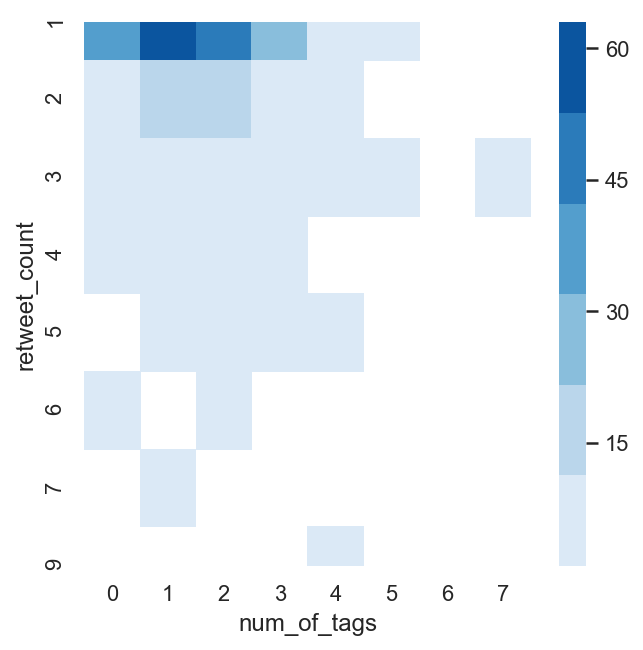

In [40]:
# hight requires logic 
print()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data=pivot_heat_retweet_1, 
            cmap=sns.color_palette("Blues"),
            ax=ax)

plt.show()

## Tweet Liking

The Heatmap for 'likes' visualizes the frequency of a given **'number of tags'** x **'number of likes'**.  

In [41]:
heat_fav = tweets_df[['retweet_count','num_of_tags','favorite_count']].groupby(['num_of_tags','favorite_count']).count().reset_index()
#heat_fav.head(8)

In [44]:
pivot_heat_fav = heat_fav.pivot('favorite_count','num_of_tags','retweet_count')
#pivot_heat_fav.head(4)
pivot_heat_fav_1 = pivot_heat_fav.iloc [1:]

In [45]:
# only about 9.9% are retweeted 
''' 
print('tweets total: ',len(tweets_df))
print('tweets without tags: ',len(tweets_df_null))
print('tweets with zero favs: ',pivot_heat_fav.iloc[0,:].sum().astype(int))

'''
print('tweets with one or more likes :',np.sum(pivot_heat_fav_1).sum().astype(int))
print('liked tweets in percent: {00:.00%}'.format(np.sum(pivot_heat_fav_1).sum()/len(tweets_df)))


tweets with one or more likes : 319
liked tweets in percent: 11%


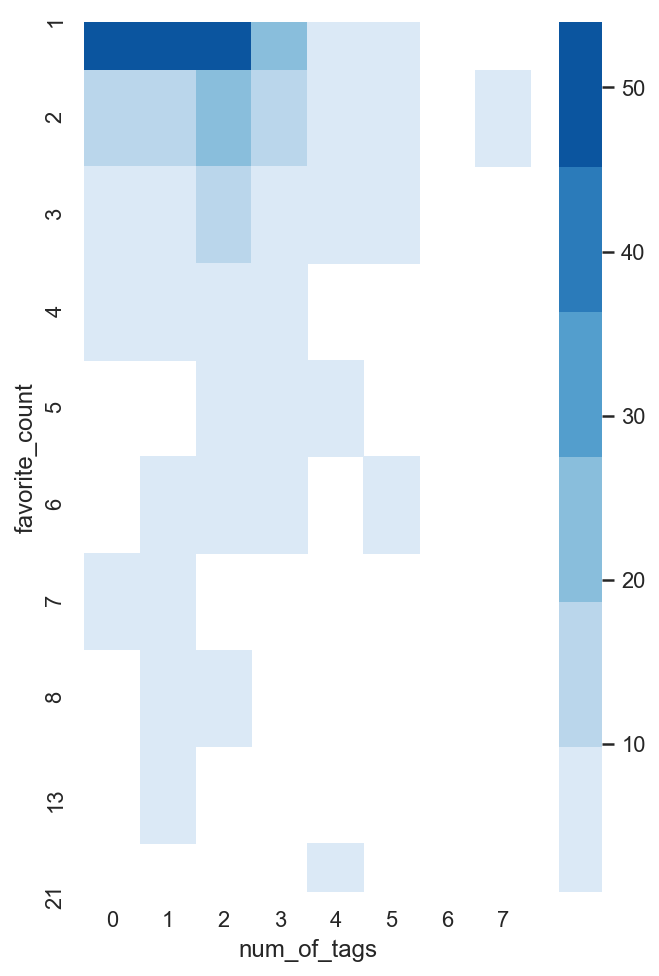

In [46]:
fig, ax = plt.subplots(figsize=(5,8))
sns.heatmap(data=pivot_heat_fav_1, 
            cmap=sns.color_palette("Blues"),
            ax=ax)

plt.show()

# Wordcloud

It's a list of words extracted from a larger text, where the importance of each word is shown with font size or color. This format is useful for quickly perceiving the most prominent terms to determine its relative prominence. Generating a word cloud includes first: 
* exluding URL and RTs and @user references 
* excluding stopwords like 'and' or 'the'

In [47]:
from wordcloud import WordCloud, STOPWORDS

In [48]:
# example of a retweet 
# tweets_df.loc[[5],['full_text']]

In [49]:
#Preprocessing del RT @blablabla:
tweets_df['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets_df['full_text'])):
    try:
        tweets_df['tweetos'][i] = tweets_df['full_text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets_df['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets_df['full_text'])):
    if tweets_df['tweetos'].str.contains('@')[i]  == False:
        tweets_df['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets_df['full_text'])):
    tweets_df['full_text'][i] = " ".join([word for word in tweets_df['full_text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])

# test  
# tweets_df.loc[[5],['full_text']]

/Users/me/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/me/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/me/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
stopwords =set(STOPWORDS)
stopwords.update({'RT','via','amp','telroadmap','will','telroadmaps','new','die','new','need','und'})
print(HEADER + 'The dataset uses ', len(stopwords),' stopwords:' + END)
print(stopwords)

The dataset uses  200  stopwords:
{'is', 'between', 'their', 'we', 'doing', "they've", 'and', 'telroadmap', 'they', 'because', 'else', 'on', 'RT', 'with', 'his', "we've", 'are', 'he', "she'd", 'herself', 'if', 'at', 'own', 'having', 'need', 'had', "hadn't", 'ours', 'me', 'being', "we'll", 'an', 'have', 'does', "what's", 'did', "shan't", 'also', "hasn't", 'und', "didn't", "here's", "you're", "weren't", 'as', 'for', "don't", "he's", 'myself', 'no', 'there', 'those', 'through', 'shall', 'more', 'himself', "mustn't", 'ought', 'yourselves', 'most', 'a', 'http', "they'd", "can't", 'other', 'or', 'out', 'was', "won't", "isn't", 'too', 'which', 'into', 'would', 'has', "it's", "how's", 'here', "i'll", 'once', "aren't", 'can', 'during', 'themselves', 'then', 'only', "i've", 'will', 'via', 'who', "when's", 'ever', 'like', 'however', "i'd", 'few', "she'll", 'itself', 'com', 'the', "he'd", 'that', 'it', 'ourselves', 'so', 'k', 'each', 'r', 'this', 'than', "you've", 'why', 'from', 'further', "should

In [51]:
print(HEADER + 'The following wordcloud is based on the top 70 most frequently used words \n' + END)

The following wordcloud is based on the top 70 most frequently used words 



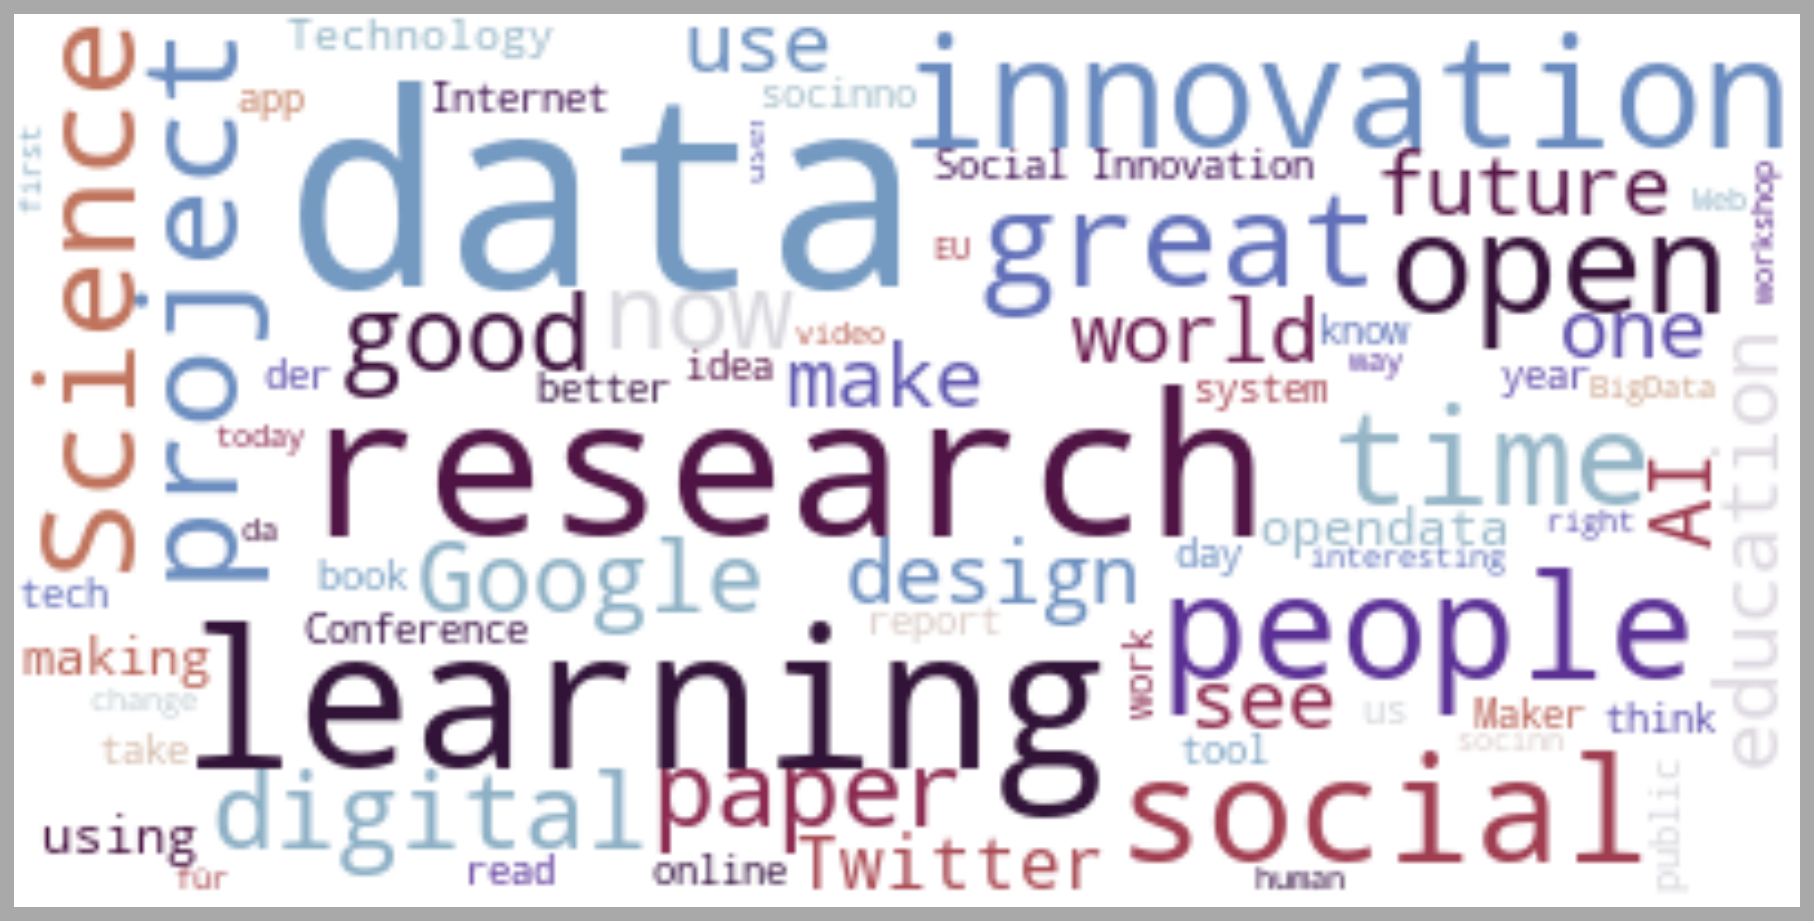

In [55]:
#cloud mit Maske https://mubaris.com/posts/dataviz-wordcloud/ (&Color)
# requires a google font?  DroidSansMono.ttf, https://github.com/amueller/word_cloud

import matplotlib

#colormap - inferno, PuOr, twilight_shifted, overview: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html

def wordcloud(tweets,col):
    wordcloud = WordCloud(background_color="white", max_font_size=60,stopwords=stopwords,max_words=70, 
                          colormap=matplotlib.cm.twilight_shifted).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(16,10), facecolor='darkgrey')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

wordcloud(tweets_df,'full_text') 

# Sentiments

Interpreting natural language, specially if presented in the compact format of a tweet is one of the hardest tasks for machines. It's often overlooked that there are not yet tools that work equally good for all topics, i.e. tweets in a politicans account can differ significantly from tweets send by a research project. Hence, in the following a tweet including 'it was hard work' or 'Science books are often boring. We did something different' can cause a tweet to be classified as 'negative'.    

The following analysis is based on a model extracted from movie reviews, using naive bayes as described here: 
https://textblob.readthedocs.io/en/dev/_modules/textblob/en/sentiments.html _(python library)_ 

A good overview abput different approaches can be found here 
https://www.ijcaonline.org/research/volume125/number3/dandrea-2015-ijca-905866.pdf

In [56]:
#tweets_df.loc[5:7,['full_text']].style

In [57]:
 #for tweet in tweets_df['full_text']:
 #   print(tweet)
    

In [68]:
# source: https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/ 

from textblob import TextBlob 
import re

def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
    
tweets =[]

for tweet in tweets_df['full_text']:
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {} 

    # saving text of tweet 
    parsed_tweet['text'] = tweet
    # saving sentiment of tweet 
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet) 
    
    tweets.append(parsed_tweet) 
    
'''
    # appending parsed tweet to tweets list 
    if tweet.retweet_count > 0: 
        # if tweet has retweets, ensure that it is appended only once 
        if parsed_tweet not in tweets: 
            tweets.append(parsed_tweet) 
    else: 
        tweets.append(parsed_tweet) 
'''

# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print(GREEN + "Positive tweets percentage:" +END + " {:.2f} %".format(100*len(ptweets)/len(tweets))) 
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print(RED + "Negative tweets percentage:" +END + " {:.2f} %".format(100*len(ntweets)/len(tweets))) 
# percentage of neutral tweets 
print(BLUE + "Neutral tweets percentage:" +END + " {:.2f} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

# printing first 5 positive tweets 
print(GREEN + BOLD + "\n Positive tweets:\n" + END) 
for no, tweet in enumerate(ptweets[:10]): 
    print(no+1,':'+ tweet['text']) 

# printing first 5 negative tweets 
print(RED + BOLD + "\nCritical tweets:\n" + END) 
for no, tweet in enumerate(ntweets[:20]): 
    print(no+1,':'+ tweet['text']) 
  


Positive tweets percentage: 41.28 %
Negative tweets percentage: 9.52 %
Neutral tweets percentage: 49.20 %

 Positive tweets:

1 :... not surprising but still good.#OECD: Extracurricular activities increasingly favor disadvantaged groups. Computers and group size are rather negligible. A diverse mix of students is key #resilience #makered
2 :RT Preferences and Ethical Priorities: Thinking Fast and Slow in AI #DigitalEthics
3 :good point by Fairness is a property of social and legal systems like employment / criminal justice, not a property of the technical tools within. Separating fairness from a social context is to make a category error #boundarysetting #socinf
4 :RT Fascinating that fairness obsession has moved from education and employment in 1960s to sentencing, surveillance and pol…
5 :RT Smart cities are decades away: but open cities are within reach: (blog by and #…
6 :RT It took us a bit, but #FabLearn 2019 videos are now available online! Check out the keynotes by and pa…
7 :R

# Possible Additions / Ideas  ... 

- network visualisation of who follows who 
- followers aggregated by country 
- cloud word only for hashtags 
- have a modus to compare 
(a) stats during diferent times, e.g. now and 12 months later or 
(b)different project accounts  
- can we discern information bubbles (aka echo chambers) 

***
Some conceptual questions ... 
=> what influences retweets / likes / impressions 
- tags 
- media 
- length 
- emotional rating 
=> what are the implications of 
- othe users are mentioned in tweet   
- who retweets    

In [1]:
# word clouds https://datascienceplus.com/twitter-analysis-with-python/

# Mapping via Folium:  of lon & lat: https://towardsdatascience.com/analysis-of-car-accidents-in-barcelona-using-pandas-matplotlib-and-folium-73384240106b

# combine figures https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0 

# basic Pandas features https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ 

# Table styling (e.g. heatmaps) https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html 

# Sentiment - naive bayes : https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/ 